# Dataset Statistics

This notebook plots statistics for our RNA inverse design dataset created using [RNASolo](https://rnasolo.cs.put.poznan.pl).
We visualise the diversity of our dataset in terms of sequence length, number of structures per sequence, as well as structural variations among conformations per sequence.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import dotenv
dotenv.load_dotenv("../.env")

True

In [2]:
import os
import ast
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, mark_inset
import seaborn as sns

In [3]:
DATA_PATH = os.environ.get("DATA_PATH")
seq_to_data = torch.load(os.path.join(DATA_PATH, "processed.pt"))
data_list = list(seq_to_data.values())

df = pd.read_csv(os.path.join(DATA_PATH, "processed_df.csv"))
# convert strings to lists
df["id_list"] = df["id_list"].apply(ast.literal_eval)
df["rfam_list"] = df["rfam_list"].apply(ast.literal_eval)
# remove 'unknown' from 'rfam_list' column
df["rfam_list"] = df["rfam_list"].apply(lambda x: [i for i in x if i != "unknown"])
df["eq_class_list"] = df["eq_class_list"].apply(ast.literal_eval)
df["type_list"] = df["type_list"].apply(ast.literal_eval)
# create new columns for the most common value in each list
df["type"] = df["type_list"].apply(lambda x: max(x, key=x.count))
df["rfam"] = df["rfam_list"].apply(lambda x: max(x, key=x.count) if len(x) > 0 else "unknown")
df

,id_list,rfam_list,eq_class_list,type_list,cluster_seqid0.8,cluster_structsim0.45,sequence,length,mean_rmsd,median_rmsd,num_structures,type,rfam
0,[8V1H_1_A],[],[unknown],[unknown],620,247,GCCCGGACGAUGCUGGUGGUUGGCACUCCUGGCCAGGACGGGGUUC...,71,0.000000,0.000000,1,unknown,unknown
1,[7ZRS_1_5-3],[5S_rRNA],[unknown],[unknown],39,1,AAACUUUCAACAACGGAUCUCUUGGUUCUCGCAUCGAUGAAGAACG...,3343,0.000000,0.000000,1,unknown,5S_rRNA
2,"[7B7D_1_LA-LC, 6GQ1_1_1-4, 6XIQ_1_1-4, 6GQB_1_...","[5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, ...","[90506, unknown, unknown, 90506, 90506, 90506]","[Protein-RNA Complex, unknown, unknown, Protei...",37,0,UUGACCUCAAAUCAGGUAGGAGUACCCGCUGAACUUAAGCAUAUCA...,3381,3.756917,4.681631,6,Protein-RNA Complex,5S_rRNA
3,"[4U4O_1_2, 4U4Z_1_2, 4U3M_1_2, 4U56_1_2, 4U4R_...","[5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, ...","[03510, 03510, 03510, 03510, 03510, 03510, 035...","[Protein-RNA Complex, Protein-RNA Complex, Pro...",155,5,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...,1750,0.348639,0.321930,16,Protein-RNA Complex,5S_rRNA
4,"[7F8Z_1_A-B, 7F8Z_1_E-F, 7EIA_1_G-H, 7F8Z_1_I-...",[],"[88157, 88157, 88157, 88157, 88157, 88157, 881...","[Solo RNA, Solo RNA, Solo RNA, Solo RNA, Solo ...",41,414,GGCGAGAACCGGGGAGCCGGCGAGAACCGGGGAGCC,36,0.841305,0.946052,9,Solo RNA,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,[7P7Q_1_A],[5S_rRNA],[98632],[Protein-RNA Complex],67,3,UUAAGUGAAUAAGGGCGCACGGUGGAUGCCUUGGCACUAGGAGCCG...,2897,0.000000,0.000000,1,Protein-RNA Complex,5S_rRNA
3727,[7QQQ_1_A],[],[55025],[Protein-RNA Complex],380,133,GGGGGCCACUAGGGACAGGAUGUUUUAGAGCUAGAAAUAGCAAGUU...,83,0.000000,0.000000,1,Protein-RNA Complex,unknown
3728,[5CD1_1_M],[tRNA],[72172],[Protein-RNA Complex],553,227,GGCCCGGAUAGCUCAGUCGGUAGAGCAUCAGACUUAAUCUGAGGGU...,74,0.000000,0.000000,1,Protein-RNA Complex,tRNA
3729,[4JF2_1_A],[],[27306],[Solo RNA],568,229,GAACCGCGAAAGCGGUUCCACGACGAUACUUAUUUCCUUUGAUCGU...,76,0.000000,0.000000,1,Solo RNA,unknown


In [4]:
# Number of unique sequences
len(df)

3731

In [5]:
# Total number of structures
df["num_structures"].sum()

11249

In [6]:
# Types of structures
df["type"].value_counts()

type
Protein-RNA Complex    2531
unknown                 709
Solo RNA                477
DNA-RNA Hybrid           14
Name: count, dtype: int64

In [7]:
# # Number of unique rfam families
# for family, count in zip(df["rfam"].unique(), df["rfam"].value_counts()):
#     print(f"{family}: {count}")

# Plot sns histogram of rfam_families column sorted by frequency of each family
# plt.figure(figsize=(10, 5))
# sns.histplot(df["rfam"].loc[df["rfam"] != "unknown"])
# plt.xticks(rotation=75)
# plt.show()

In [8]:
# Distribution of sequence length

seq_lens = df["length"].values

print(f"Distribution: {np.mean(seq_lens):.2f} +- {np.std(seq_lens):.2f}")
print(f"Max: {np.max(seq_lens)}, Min: {np.min(seq_lens)}")

Distribution: 815.66 +- 1127.60
Max: 4455, Min: 11


/var/folders/ls/nyl1g1l94vg3z2jnzsqq6mp80000gn/T/ipykernel_7945/1957729900.py:16: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])


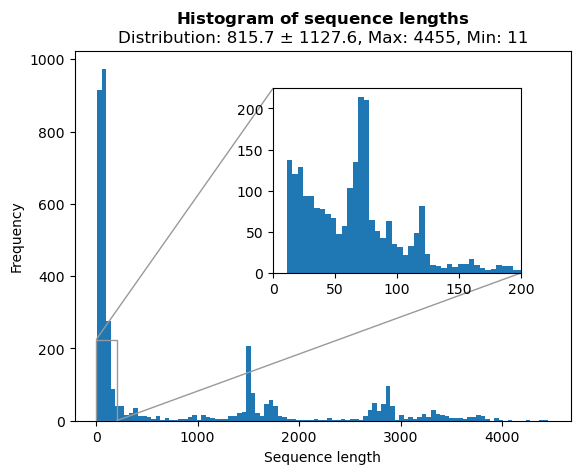

In [9]:
fig, ax1 = plt.subplots()

# Plot a histogram
ax1.hist(seq_lens, bins=100)

# Add labels and title
ax1.set_xlabel('Sequence length')
ax1.set_ylabel('Frequency')
ax1.set_title( 
    r"$\bf{" + "Histogram \ of \ sequence \ lengths" + "}$" + f"\nDistribution: {np.mean(seq_lens):.1f} ± {np.std(seq_lens):.1f}, Max: {np.max(seq_lens)}, Min: {np.min(seq_lens)}"
)

# Create a set of inset Axes
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 
# and draw lines in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.6')

# Plot second histogram
ax2.hist(seq_lens, bins=1000)
ax2.set_xlim([0,200])

# Some ad hoc tweaks.
# ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')
# ax2.tick_params(axis='x', which='major', pad=8)

# Display the plot
# plt.savefig('hist_seq_len.pdf', dpi=300)
plt.show()

In [10]:
# Distribution of number of structures per unique sequence

num_struct_per_seq = df["num_structures"].values
print(f"Distribution: {np.mean(num_struct_per_seq)} +- {np.std(num_struct_per_seq)}")
print(f"Max: {np.max(num_struct_per_seq)}, Min: {np.min(num_struct_per_seq)}")

Distribution: 3.0150093808630394 +- 10.574329569870159
Max: 281, Min: 1


/var/folders/ls/nyl1g1l94vg3z2jnzsqq6mp80000gn/T/ipykernel_7945/4089939208.py:17: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])


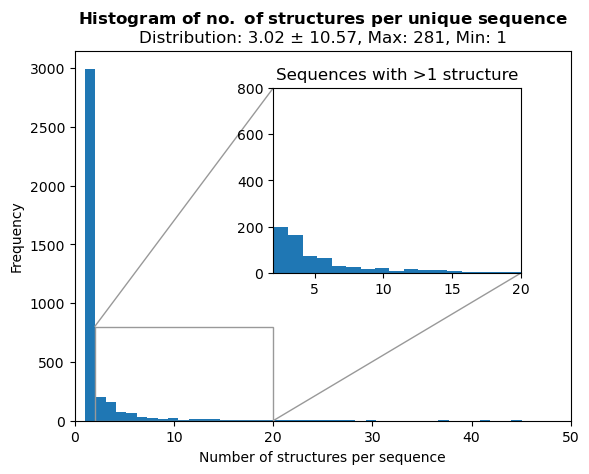

In [11]:
fig, ax1 = plt.subplots()

# Plot a histogram
ax1.hist(num_struct_per_seq, bins=267)

# Add labels and title
ax1.set_xlabel('Number of structures per sequence')
ax1.set_ylabel('Frequency')
ax1.set_title( 
    r"$\bf{" + "Histogram \ of \ no. \ of \ structures \ per \ unique \ sequence" + "}$" + f"\nDistribution: {np.mean(num_struct_per_seq):.2f} ± {np.std(num_struct_per_seq):.2f}, Max: {np.max(num_struct_per_seq)}, Min: {np.min(num_struct_per_seq)}"
)
ax1.set_xlim([0,50])

# Create a set of inset Axes
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 
# and draw lines in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.6')

# Plot second histogram
ax2.hist(num_struct_per_seq, bins=267)
ax2.set_xlim([2,20])
ax2.set_ylim([0,800])
ax2.set_title("Sequences with >1 structure")

# Some ad hoc tweaks.
# ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')
# ax2.tick_params(axis='x', which='major', pad=8)

# Display the plot
# plt.savefig('hist_num_struct_per_seq.pdf', dpi=300)
plt.show()

In [27]:
# Raw values of number of some structures per sequence distribution
bin, count = np.unique(num_struct_per_seq, return_counts=True)
for i, pair in enumerate(zip(bin, count)):
    if i < 10 or i > len(bin) - 4:
        print(f"{pair[0]} structures for that sequence -> {pair[1]} samples")
    elif i == len(bin) // 2:
        print("...")

1 structures for that sequence -> 2676 samples
2 structures for that sequence -> 724 samples
3 structures for that sequence -> 248 samples
4 structures for that sequence -> 182 samples
5 structures for that sequence -> 72 samples
6 structures for that sequence -> 70 samples
7 structures for that sequence -> 32 samples
8 structures for that sequence -> 39 samples
9 structures for that sequence -> 13 samples
10 structures for that sequence -> 22 samples
...
181 structures for that sequence -> 1 samples
265 structures for that sequence -> 1 samples
267 structures for that sequence -> 1 samples


In [12]:
# Frequency of each base in the sequences
# Pyrimidine (C, U)
# Purine (A, G)

base_counts = {'A': 0, 'G': 0, 'C': 0, 'U': 0, 'other': 0}
for data in tqdm(data_list):
    for base in data['sequence']:
        if base in base_counts:
            base_counts[base] += 1
        else:
            base_counts['other'] += 1

for base in base_counts:
    print(f"{base}: {base_counts[base]}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 3731/3731 [00:00<00:00, 12110.26it/s]

A: 756921
G: 937297
C: 723182
U: 625511
other: 300


Distribution: 1.3309729276920925 +- 1.8880601902593734
Max: 18.35241640850522, Min: 2.645016652227541e-07


/var/folders/4_/jrr42vpx3vb447nslw95sscw0000gn/T/ipykernel_98447/2406943871.py:24: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])


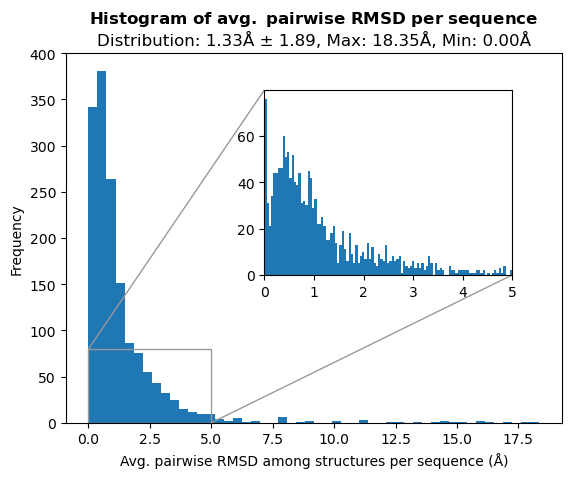

In [29]:
# Distribution of average RMSD per sequence
# Note: Omit avg. RMSD = 0, which are sequences with a single structure

rmsd_per_seq = [x for x in df["mean_rmsd"].values if x > 0.0]
print(f"Distribution: {np.mean(rmsd_per_seq)} +- {np.std(rmsd_per_seq)}")
print(f"Max: {np.max(rmsd_per_seq)}, Min: {np.min(rmsd_per_seq)}")

fig, ax1 = plt.subplots()

# Plot a histogram
ax1.hist(rmsd_per_seq, bins=50)

# Add labels and title
ax1.set_xlabel('Avg. pairwise RMSD among structures per sequence (Å)')
ax1.set_ylabel('Frequency')
# plt.title('Histogram of average RMSD per sequence')
ax1.set_title( 
    r"$\bf{" + "Histogram \ of \ avg. \ pairwise \ RMSD \ per \ sequence" + "}$" + f"\nDistribution: {np.mean(rmsd_per_seq):.2f}Å ± {np.std(rmsd_per_seq):.2f}, Max: {np.max(rmsd_per_seq):.2f}Å, Min: {np.min(rmsd_per_seq):.2f}Å"
)

# Create a set of inset Axes
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 
# and draw lines in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.6')

# Plot second histogram
ax2.hist(rmsd_per_seq, bins=400)
ax2.set_xlim([0,5])
# ax2.set_ylim([0,1000])

# Display the plot
# plt.savefig('hist_rmsd_per_sequence.pdf', dpi=300)
plt.show()

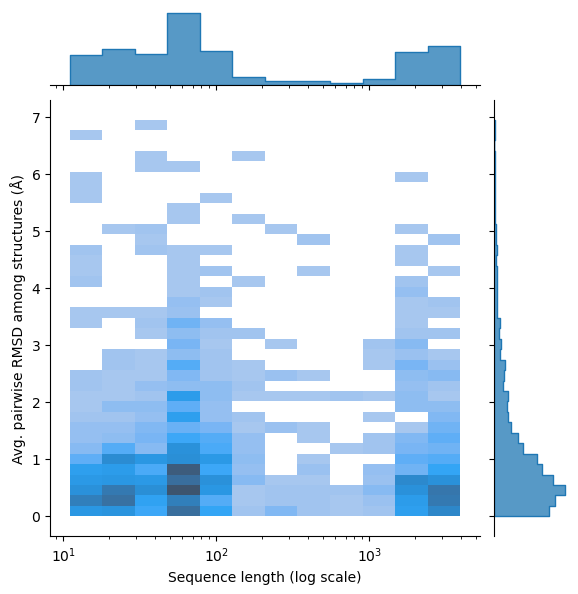

In [30]:
# df = pd.DataFrame({'Sequence length': seq_len, 'Average RMSD': rmsd_per_seq})
# create a bivariate distribution plot using seaborn
ax = sns.jointplot(
    data=df.loc[(df["mean_rmsd"] > 0.0) & (df["mean_rmsd"] < 7.5)], 
    x='length', 
    y='mean_rmsd', 
    kind='hist', 
    log_scale=(True, False), 
    marginal_kws=dict(element='step', fill=True)
)

# ax.set_ylim([0,5])

# Add labels and title
plt.xlabel('Sequence length (log scale)')
plt.ylabel('Avg. pairwise RMSD among structures (Å)')
# plt.title( 
#     "Bivariate Distribution Plot for sequence length vs. avg. pairwise RMSD"
#     # r"$\bf{" + "Histogram \ of \ avg. \ pairwise \ RMSD \ per \ sequence" + "}$" + f"\nDistribution: {np.mean(rmsd_per_seq):.2f} ± {np.std(rmsd_per_seq):.2f}, Max: {np.max(rmsd_per_seq):.2f}, Min: {np.min(rmsd_per_seq):.2f}"
# )

# Display the plot
# plt.savefig('bivariate_seq_vs_rmsd.pdf', dpi=300)
plt.show()
